In [1]:
import numpy as np
import qutip as qt

from swap_files.swap_TN_direct import create_polarization_bell_state,\
                                      calc_fidelity,\
                                      outer_product_mps,\
                                      read_quantum_state

from matplotlib import pyplot as plt

/home/asingal/home/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/asingal/home/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


one_state: [[0.+0.j]
 [1.+0.j]
 [0.+0.j]]
NOT_gate: [[0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]]
Corresponding Basis terms:
0H1V_B 1H0V_A - 12 - [0.70710678+0.j]
1H0V_B 0H1V_A - 28 - [0.70710678+0.j]


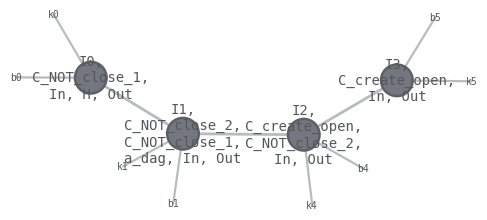

<class 'quimb.tensor.tensor_1d.MatrixProductOperator'>


In [2]:
calc_fidelity(None, "psi_plus", 3)

one_state: [[0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]]
NOT_gate: [[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Corresponding Basis terms:
0H1V_B 1H0V_A - 20 - [0.70710678+0.j]
1H0V_B 0H1V_A - 65 - [0.70710678+0.j]


array([[0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 4.93038066e-32+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       ...,
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j]])

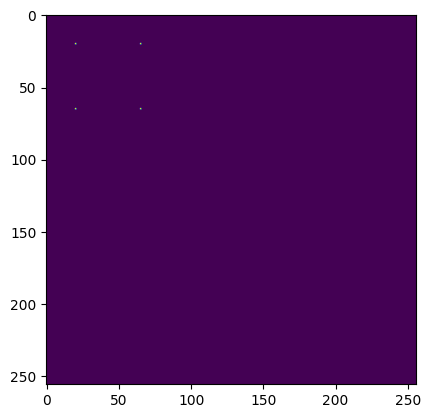

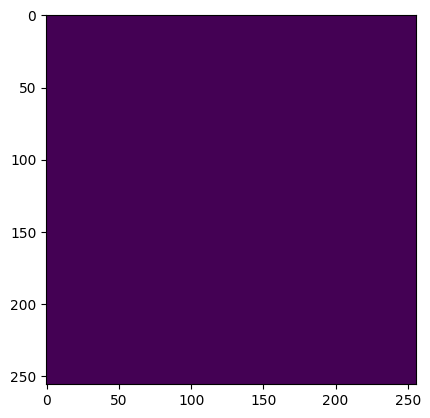

In [42]:
state = create_polarization_bell_state("psi_plus", 4, error_tolerance = 1e-10)
out_state = outer_product_mps(state)
dense_state = read_quantum_state(out_state, 2, num_states=2, return_dense = True)

plt.imshow(dense_state.real)
plt.figure()
plt.imshow(dense_state.imag)
dense_state
# calc_fidelity(state, reference_state, N)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


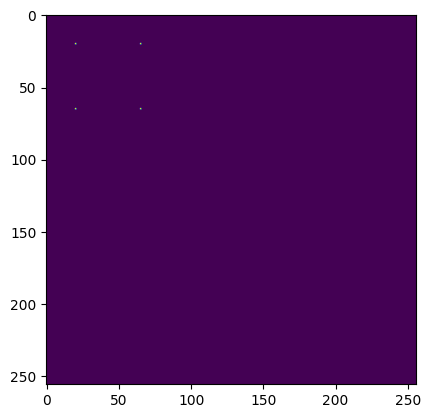

In [43]:
# Comparing the results with analytical results:
zero_state = np.zeros((4,1))
zero_state[0] = 1

one_state = np.zeros((4,1))
one_state[1] = 1

psi_plus = (np.kron(np.kron(one_state, zero_state), np.kron(zero_state, one_state)) + np.kron(np.kron(zero_state, one_state), np.kron(one_state, zero_state)))/np.sqrt(2)

psi_plus_outer = psi_plus @ psi_plus.conj().T

plt.imshow(psi_plus_outer)

print(psi_plus_outer)

True

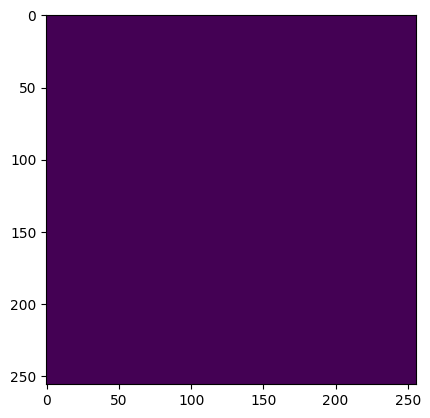

In [44]:
plt.imshow(np.round(dense_state - psi_plus_outer, 1).real)
np.all(np.round(dense_state - psi_plus_outer, 15) == 0)
# for i in range(len(dense_state - psi_plus_outer)):
#     for j in range(len(dense_state - psi_plus_outer)):
#         print((psi_plus_outer)[i,j])